In [33]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import homogeneity_score, completeness_score, adjusted_mutual_info_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline, make_pipeline


In [34]:
rain_df = pd.read_csv('cleanInfile.csv')
rain_df

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503167,16.9,21.8,0.0,0
1,2,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,4.437189,4.503167,17.2,24.3,0.0,0
2,2,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,4.437189,2.000000,21.0,23.2,0.0,0
3,2,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.437189,4.503167,18.1,26.5,0.0,0
4,2,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,41,3.5,21.8,0.0,0,31.0,2,0,15.0,13.0,59.0,27.0,1024.7,1021.2,4.437189,4.503167,9.4,20.9,0.0,0
142189,41,2.8,23.4,0.0,0,31.0,9,1,13.0,11.0,51.0,24.0,1024.6,1020.3,4.437189,4.503167,10.1,22.4,0.0,0
142190,41,3.6,25.3,0.0,6,22.0,9,3,13.0,9.0,56.0,21.0,1023.5,1019.1,4.437189,4.503167,10.9,24.5,0.0,0
142191,41,5.4,26.9,0.0,3,37.0,9,14,9.0,9.0,53.0,24.0,1021.0,1016.8,4.437189,4.503167,12.5,26.1,0.0,0


## Data Splitting

In [35]:
y = rain_df['RainTomorrow'].values
X = rain_df.drop('RainTomorrow', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

# Part 1

## PCA

In [36]:
# define max number of components
components = list(range(1, 20))
# compute the explained variance ratios and plot them
pca = PCA(n_components=19)
pca.fit(X)
variance_ratios = pca.explained_variance_ratio_
variance_ratios


array([4.08462648e-01, 1.68449968e-01, 1.17126295e-01, 8.34550796e-02,
       6.60931194e-02, 3.60490223e-02, 3.27625882e-02, 2.34263328e-02,
       2.09501895e-02, 1.74125587e-02, 9.47513410e-03, 5.91125902e-03,
       3.82826409e-03, 2.95586283e-03, 1.19648275e-03, 9.75562469e-04,
       7.33172263e-04, 6.75781497e-04, 6.06800781e-05])

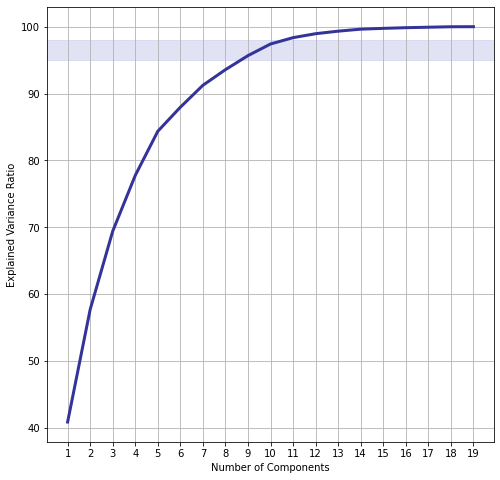

In [37]:
variances = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

fig, ax = plt.subplots(1, figsize=(8, 8))
sns.lineplot(x=components, y=variances, linewidth=3, color='#333399', ax=ax)
ax.axhspan(95, 98, alpha=0.5, color='#c6c6ec')
ax.set_xlabel('Number of Components')
ax.set_ylabel('Explained Variance Ratio')
plt.xticks(np.arange(min(components), max(components)+1, 1.0))
plt.grid()
plt.show()

## Naive Bayes

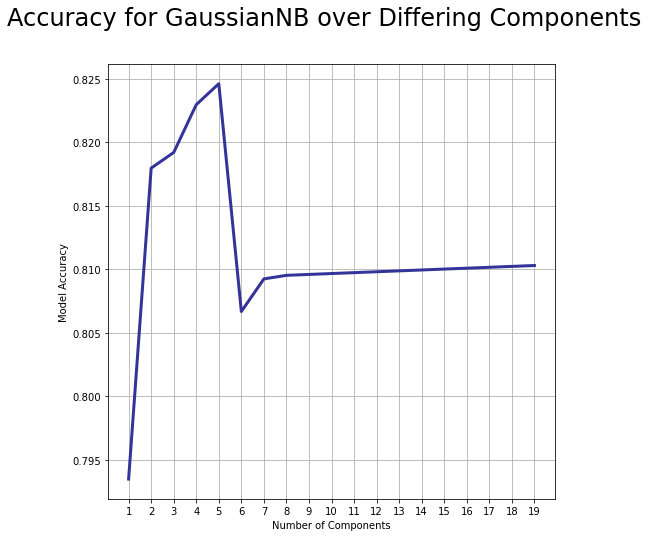

In [38]:
accuracies = []

for i in [1, 2, 3, 4, 5, 6, 7, 8, 19]:
	# create a pipeline that conducts a transformation (PCA) then Kmeans modelling
	reducer = Pipeline([('pca', PCA(n_components=i, random_state=42))])
	gnb = Pipeline([('gnb', GaussianNB())])

	# create pipeline for all steps and fit
	pipe = Pipeline([('preprocessor', reducer), ('model', gnb)])
	pipe.fit(X_train, y_train)
	y_pred = pipe.predict(X_test)
	accuracies.append(accuracy_score(y_test, y_pred))

fig, ax = plt.subplots(1, figsize=(8, 8))
sns.lineplot(x=[1, 2, 3, 4, 5, 6, 7, 8, 19], y=accuracies, linewidth=3, color='#333399', ax=ax)
ax.set_xlabel('Number of Components')
ax.set_ylabel('Model Accuracy')
plt.xticks(np.arange(min([1, 2, 3, 4, 5, 6, 7, 8, 19]), max([1, 2, 3, 4, 5, 6, 7, 8, 19])+1, 1.0))
plt.suptitle('Accuracy for GaussianNB over Differing Components', fontsize=24)
plt.grid()
plt.show()

# Part 2

In [39]:
cluster_1 = pd.read_csv('outfile1.csv')
cluster_1['cluster'] = 1
cluster_2 = pd.read_csv('outfile2.csv')
cluster_2['cluster'] = 2
cluster_3 = pd.read_csv('outfile3.csv')
cluster_3['cluster'] = 3

out_df = pd.concat([cluster_1, cluster_2], ignore_index=True)
out_df = pd.concat([out_df, cluster_3], ignore_index=True)

In [40]:
kmeans = KMeans(n_clusters=3, random_state=42)
predicted_kmeans = kmeans.fit_predict(out_df)

In [41]:
db = DBSCAN()
predicted_dbscan= db.fit_predict(out_df)

In [42]:
# calculate metrics
print('Clustering Scores for KMeans')
print('----------------------------')
print(homogeneity_score(labels_true=out_df['cluster'].values, labels_pred=predicted_kmeans))
print(completeness_score(labels_true=out_df['cluster'].values, labels_pred=predicted_kmeans))
print(adjusted_mutual_info_score(labels_true=out_df['cluster'].values, labels_pred=predicted_kmeans))
print('')
print('Clustering Scores for DBScan')
print('----------------------------')
print(homogeneity_score(labels_true=out_df['cluster'].values, labels_pred=predicted_dbscan))
print(completeness_score(labels_true=out_df['cluster'].values, labels_pred=predicted_dbscan))
print(adjusted_mutual_info_score(labels_true=out_df['cluster'].values, labels_pred=predicted_dbscan))

Clustering Scores for KMeans
----------------------------
0.3555109119015239
0.36571297153437676
0.3593526674451633

Clustering Scores for DBScan
----------------------------
0.21043026623997912
0.18470488050854594
0.1680084533813571
